This project aims to analyse a burnt-calorie dataset to predict the number of calories burned during a workout session. 
The dataset contains features such as age, gender, height, weight, workout duration, heart rate, and body temperature.

This prediction can help to assist personalised fitness coaches in determining the best workouts for specific results.
It could also assist in monitoring the health of their clients by removing injurious work-out routines.

This project will be conducted in several phases which are:

1. Data Understanding and Cleaning
2. Exploratory Data Analysis (EDA)
 3. Feature Engineering and Selection
 4. Linear Regression Model
 5.  Insights and Conclusion


## Data Understanding and Cleaning

To assist with working with the data, I will import the following libraries, which contain pre-written codes to help us optimise our work with the data set

In [4]:
import pandas as pd              #Pandas will help with data manipulation
import numpy as np               # This helps to work with numerical computation
import matplotlib.pyplot as plt  #Matplotlib helps with data visualisation
import seaborn as sns            # Seaborn also helps in creating more colourful visualisation
import mplcursors




#### Loading the Dataset: Here I use the pandas library to load dataset for inspection

In [6]:
data_set = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/Machine-Learning/refs/heads/main/3.%20Classification%20-/Exercise.csv')

data_set.head() # This code shows the first 5 rows in the dataset

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [7]:
# To know the number of rows and columns in the data set. This helps in understanding our data also.

data_set.shape

(15000, 9)

#Below are the properties of the columns in the dataset. 

Class: Shows it is a data frame- a data frame is a 2D data table with multiple rows and columns
RangeIndex: This shows the number of rows to be 15000 with the index numbering the rows from 0 to 14999
Data Columns: are 9
dtypes: shows the various data types in the data set.


In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


From the dataset we can see that all the columns have values - there are no missing values

#### Also, we can check specifically for the null values (missing values)

In [12]:
data_set.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

We can see that there are no null values in the data set

#### We check for any duplicate values

In [15]:
data_set.duplicated().sum()

0

There are no duplicate rows in the data set

#### We use our knowledge of the domain to check for the consistency of the data types

In [18]:
data_set.dtypes

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

In [19]:
data_set['Gender'] .unique()

array(['male', 'female'], dtype=object)

In [20]:
data_set['Height'].unique()

array([190, 166, 179, 154, 151, 158, 175, 186, 146, 177, 157, 171, 182,
       156, 169, 188, 189, 148, 165, 176, 173, 159, 183, 160, 184, 155,
       195, 152, 193, 168, 174, 191, 164, 198, 170, 167, 185, 163, 192,
       178, 197, 187, 144, 202, 201, 181, 136, 180, 194, 143, 149, 172,
       153, 147, 199, 161, 204, 203, 145, 200, 150, 162, 205, 208, 209,
       206, 140, 132, 196, 207, 212, 135, 133, 139, 138, 217, 211, 142,
       137, 213, 210, 141, 123, 214, 127, 218, 126, 134, 222, 219],
      dtype=int64)

In [21]:
data_set['Weight'].unique()

array([ 94,  60,  79,  71,  58,  50,  56,  85,  51,  76,  54,  62,  82,
        67,  65,  86,  93,  59,  75,  73,  88,  68,  84,  80,  57,  70,
        66,  55,  98,  69, 101,  89,  64,  63,  77,  61,  83,  92,  72,
       100,  91,  74,  87, 107,  53,  96,  81,  90,  45,  52,  49,  78,
        47,  95, 109, 104, 102, 103, 105, 112,  97,  99, 111,  42, 115,
        38,  46, 108, 106,  48,  40,  44, 114,  41, 110,  43, 118, 113,
       124, 117, 122, 120, 116, 121, 132,  39, 119,  36, 128, 126, 123],
      dtype=int64)

In [22]:
data_set['Heart_Rate'].unique()

array([105,  94,  88, 100,  81,  96,  95,  97,  90,  74,  93,  82, 104,
        89,  85,  77,  84,  80,  83,  78, 106, 102,  91, 114,  92, 108,
        98,  86,  79, 113,  99, 111, 101, 109,  76, 103, 110,  73, 107,
       115, 112,  87, 116, 118, 119, 123,  75,  69, 120, 117,  71, 121,
        70,  72,  67, 122, 125,  68, 128], dtype=int64)

In [23]:
data_set['Calories'].unique()

array([231,  66,  26,  71,  35, 123, 112, 143, 134,  72,   3,  92,  58,
        88,   7, 170,  11,  43,  15,  74,  29,  32,  10, 155,  24,  12,
       195,   5,  69, 136,  80, 107, 200,  56,  50, 100,   4,  70, 127,
       197, 113,  82, 141,  30,  37, 147,   8, 159,  93, 173,  89,  31,
        94,  49,  54, 117,  99,  45, 166, 202, 199,  25,  23,   6, 188,
       103, 128, 130,  27, 185,  57,  65,  91, 120,  39,  77,  42,  41,
        59, 179,  13, 180, 101, 150, 247,  18, 207, 189,  60, 186, 178,
       122, 158,  86, 182,  52, 236, 114,  64, 171,  19, 144, 149,  78,
        20,  17, 115, 119, 168,  44, 192,  96, 135, 239,  46, 190,  48,
        95, 196,   9, 105, 111, 108,  67,  62, 172,  84, 132, 167,  28,
       157, 133, 145, 174,  34, 193, 161,  85,  90, 176,  51,  22, 212,
       201,  83,  87, 221, 257, 169,  21, 156, 140,  79,  16, 137,  76,
       187, 109, 204,  36, 151, 138, 116, 110, 163,  38, 104, 183, 152,
       223, 181, 216,  68, 129, 121, 126,  63, 215, 160, 154, 12

In [24]:
data_set['Duration'].unique()

array([29, 14,  5, 13, 10, 23, 22, 25, 21, 16,  1, 17, 11, 18,  2, 28,  4,
        8,  3,  7, 24, 20,  9, 15, 19, 27, 12, 26,  6, 30], dtype=int64)

#### On checking the unique values in the columns, I can see that the data types are consistent with the values in the column.

In [26]:
data_set

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


In [27]:
data_set.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,15000.0,NaN,NaN,NaN,14977358.538467,2872851.452233,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Gender,15000,2,female,7553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,15000.0,NaN,NaN,NaN,42.7898,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,NaN,NaN,NaN,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,NaN,NaN,NaN,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,NaN,NaN,NaN,15.5306,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,NaN,NaN,NaN,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,NaN,NaN,NaN,40.025453,0.77923,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,NaN,NaN,NaN,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


My dataset is good to work with

## FEATURE ENGINEERING

In this feature engineering, I will convert some of the features of the data set to more revealing ones.

Here ,I will create BMIBMI

### BMI 
BMI (Body Mass Index) is a tool we can use to estimate the amount of body fat by using the height and weight measurements. 
This tell us better about how the weight category of the user.

This feature can give us insight on which BMI category burn more calories.

In [31]:
data_set['BMI'] = data_set['Weight']/ (data_set['Height']/100)
data_set.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,14733363,male,68,190,94,29,105,40.8,231,49.473684
1,14861698,female,20,166,60,14,94,40.3,66,36.144578
2,11179863,male,69,179,79,5,88,38.7,26,44.134078
3,16180408,female,34,179,71,13,100,40.5,71,39.664804
4,17771927,female,27,154,58,10,81,39.8,35,37.662338


### Intensity of the Workout

We can also obtain a feature to allow us see how many times the user's heart beat during the workout.

This can tell us about the intensity of the user's workout.

We can see how the amount of heart beats affects how much the calories burn.

This insight can help us make recommendations on structuring the user's workout based on their goals.

In [33]:
data_set['Intensity'] = data_set['Duration'] * data_set['Heart_Rate']
data_set.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Intensity
0,14733363,male,68,190,94,29,105,40.8,231,49.473684,3045
1,14861698,female,20,166,60,14,94,40.3,66,36.144578,1316
2,11179863,male,69,179,79,5,88,38.7,26,44.134078,440
3,16180408,female,34,179,71,13,100,40.5,71,39.664804,1300
4,17771927,female,27,154,58,10,81,39.8,35,37.662338,810


### Grouping the Columns into Labels

We will use the Pandas cut function to group the Age and BMI into categories.
It can help to reveal relationships between the categories of users and the amount of calories burnt.

### Age Categories

Research has shown that the rate of burning calories during a workout varies with age. The younger a user, the more calories they are likely to burn.

Now we will classify the users under the following groups:

In [36]:
data_set['Age_Group'] = pd.cut(x = data_set['Age'], bins = [0, 30, 45, 60, 100], labels = ['Young Adults', 'Adults', 'Middle-Aged', 'Seniors'])
data_set.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Intensity,Age_Group
0,14733363,male,68,190,94,29,105,40.8,231,49.473684,3045,Seniors
1,14861698,female,20,166,60,14,94,40.3,66,36.144578,1316,Young Adults
2,11179863,male,69,179,79,5,88,38.7,26,44.134078,440,Seniors
3,16180408,female,34,179,71,13,100,40.5,71,39.664804,1300,Adults
4,17771927,female,27,154,58,10,81,39.8,35,37.662338,810,Young Adults


### BMI Categories
This categorisation will let us group our users under the following categories:
Underweight: <18.5
Normal Weight: 18.5 - 24.9
Overweight: 25-29.9
Obese: 30-39.9
Morbidly obese:>40



In [38]:
data_set['BMI_Category'] = pd.cut(x = data_set['BMI'], bins = [0, 18.5, 24.9, 29.9, 39.9, 100], labels = ['Under Weight', 'Normal Weight', 'Over Weight', 'Obese', 'Morbidly Obese'])

data_set.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Intensity,Age_Group,BMI_Category
0,14733363,male,68,190,94,29,105,40.8,231,49.473684,3045,Seniors,Morbidly Obese
1,14861698,female,20,166,60,14,94,40.3,66,36.144578,1316,Young Adults,Obese
2,11179863,male,69,179,79,5,88,38.7,26,44.134078,440,Seniors,Morbidly Obese
3,16180408,female,34,179,71,13,100,40.5,71,39.664804,1300,Adults,Obese
4,17771927,female,27,154,58,10,81,39.8,35,37.662338,810,Young Adults,Obese


### Scaling

Scaling our data will make sure the model makes prediction without bias. 

In [40]:
numerical_columns = data_set.select_dtypes(include = np.number).columns
numerical_columns

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'BMI', 'Intensity'],
      dtype='object')

In [41]:
categorical_columns = data_set.select_dtypes(include = ['object', 'category']).columns
categorical_columns


Index(['Gender', 'Age_Group', 'BMI_Category'], dtype='object')

## Exploratory Data Analysis

Now we are going to split our columns into Numerical Columns and Categorical Columns

In [44]:
categorical_columns = data_set.select_dtypes(include = ['object', 'category']).columns
categorical_columns

Index(['Gender', 'Age_Group', 'BMI_Category'], dtype='object')

In [45]:
numerical_columns = data_set.select_dtypes(include = np.number).columns
numerical_columns

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'BMI', 'Intensity'],
      dtype='object')

##### Now, I want to get a histogram and a Box plot for the numerical columns

##### The Histogram will be a plot of the column and its counts. This will allow me to see the frequency of the various values in the data set.

##### The Box plot will let me check for outliers in the column.

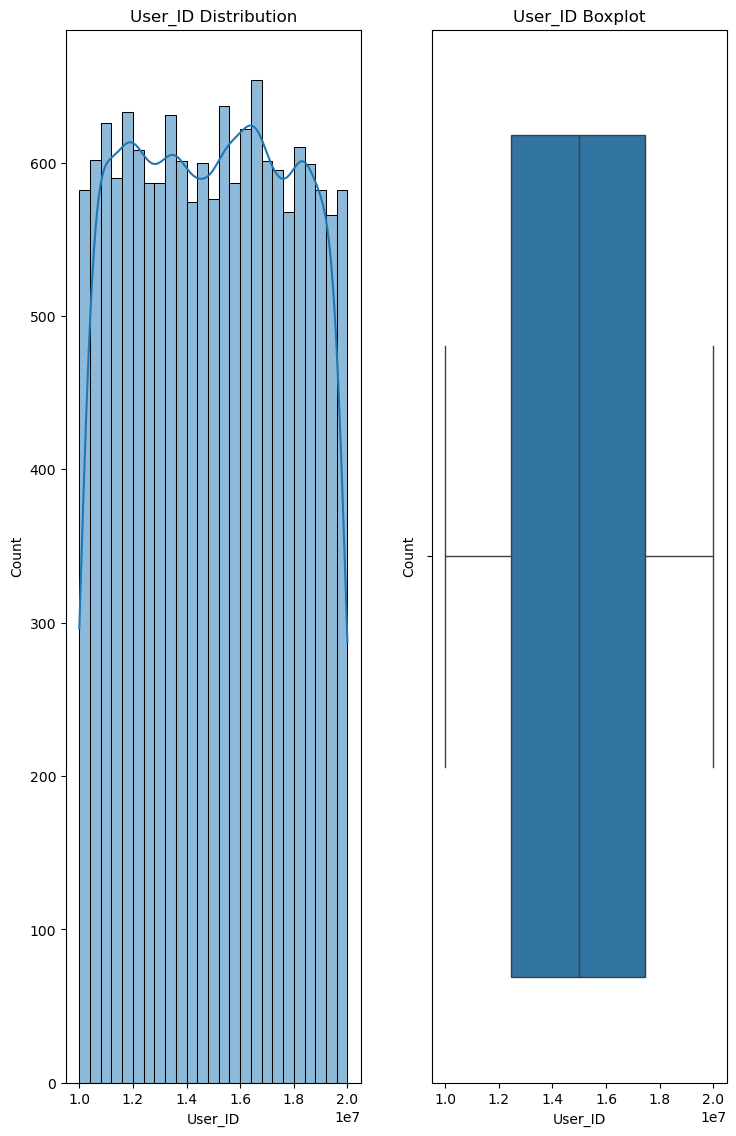

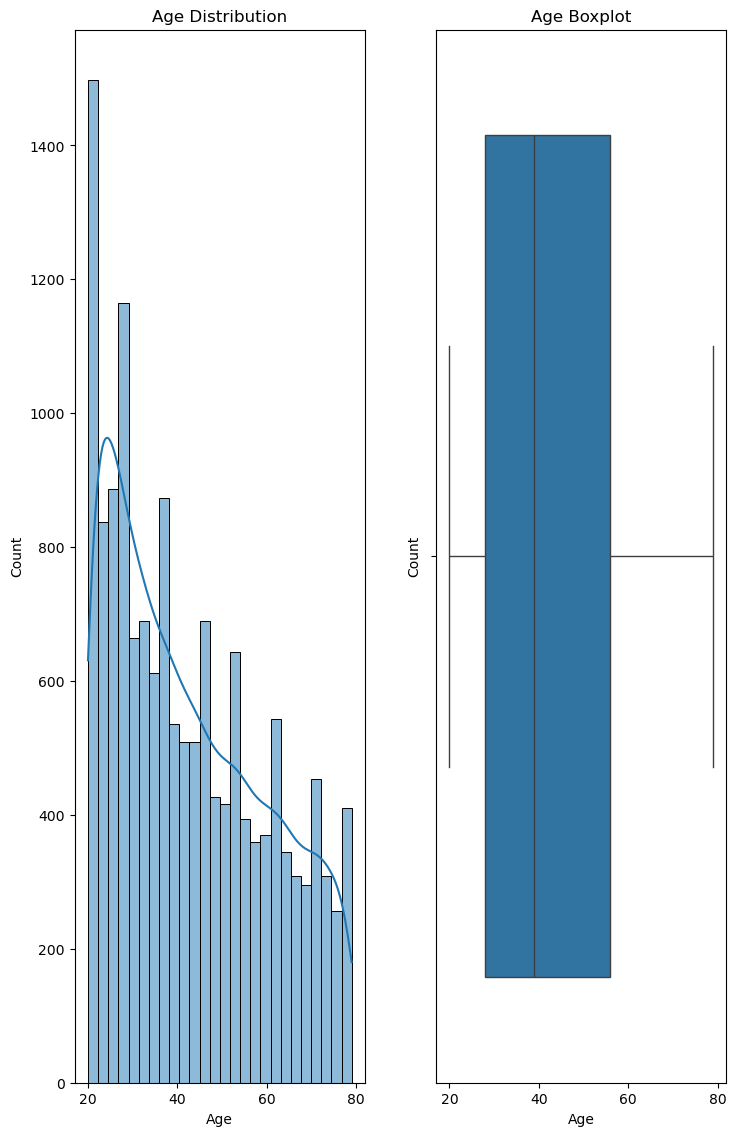

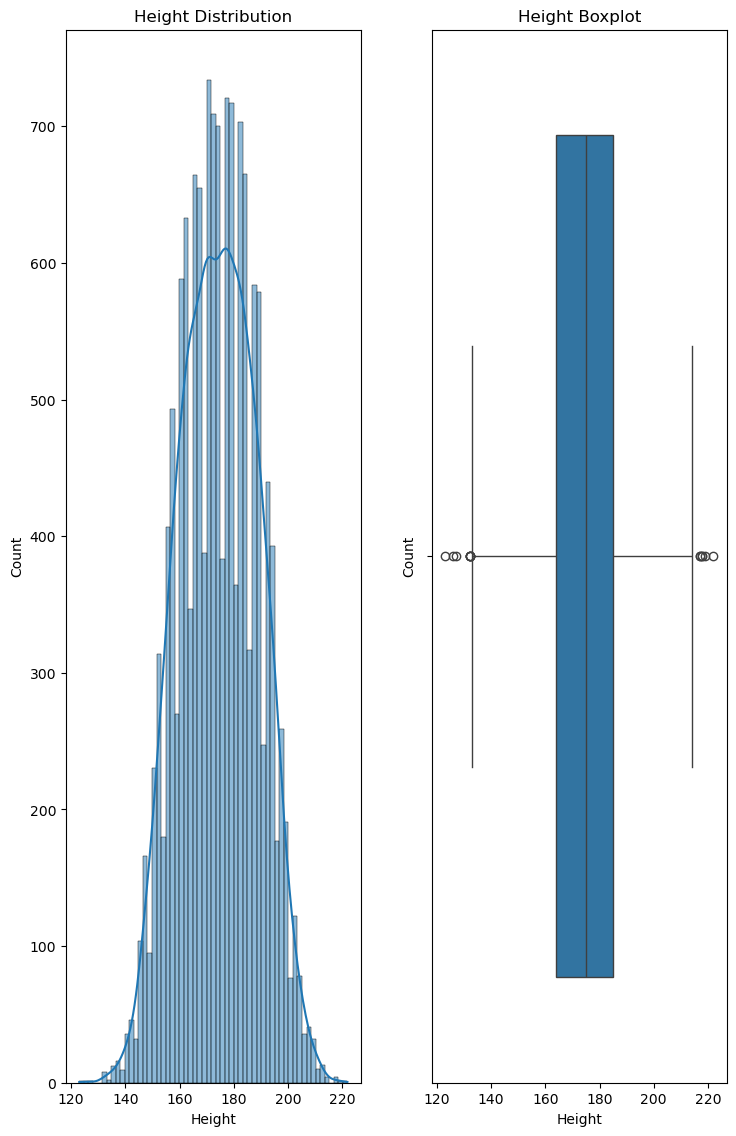

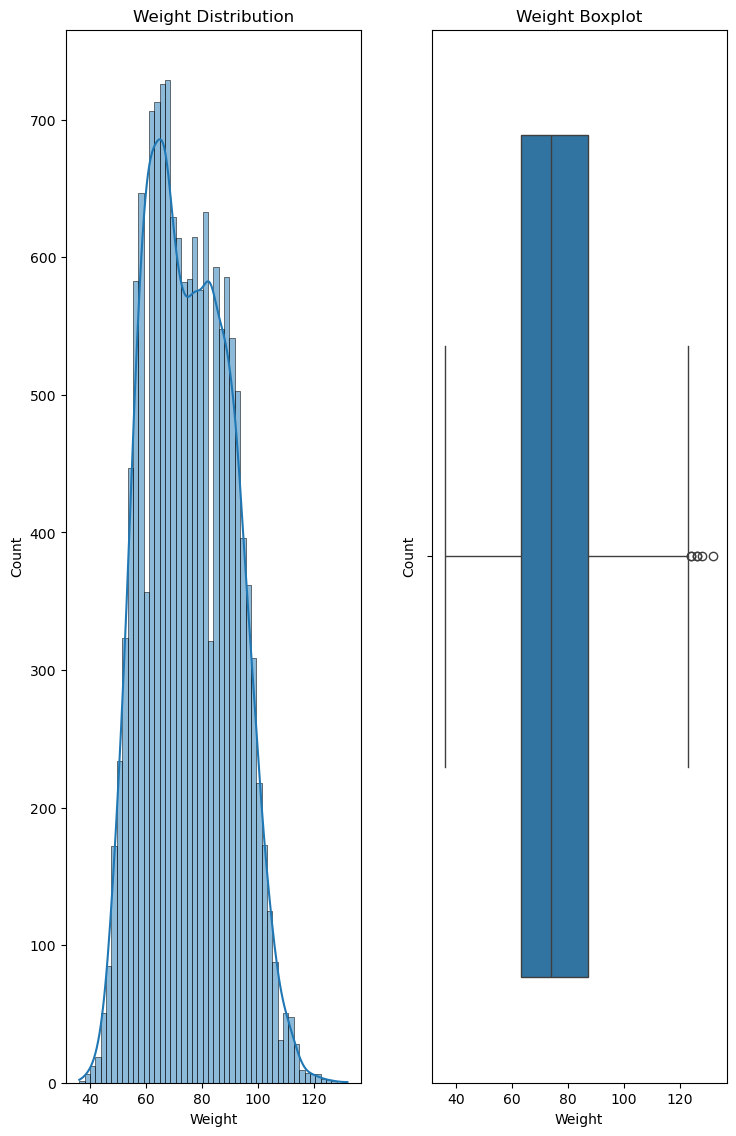

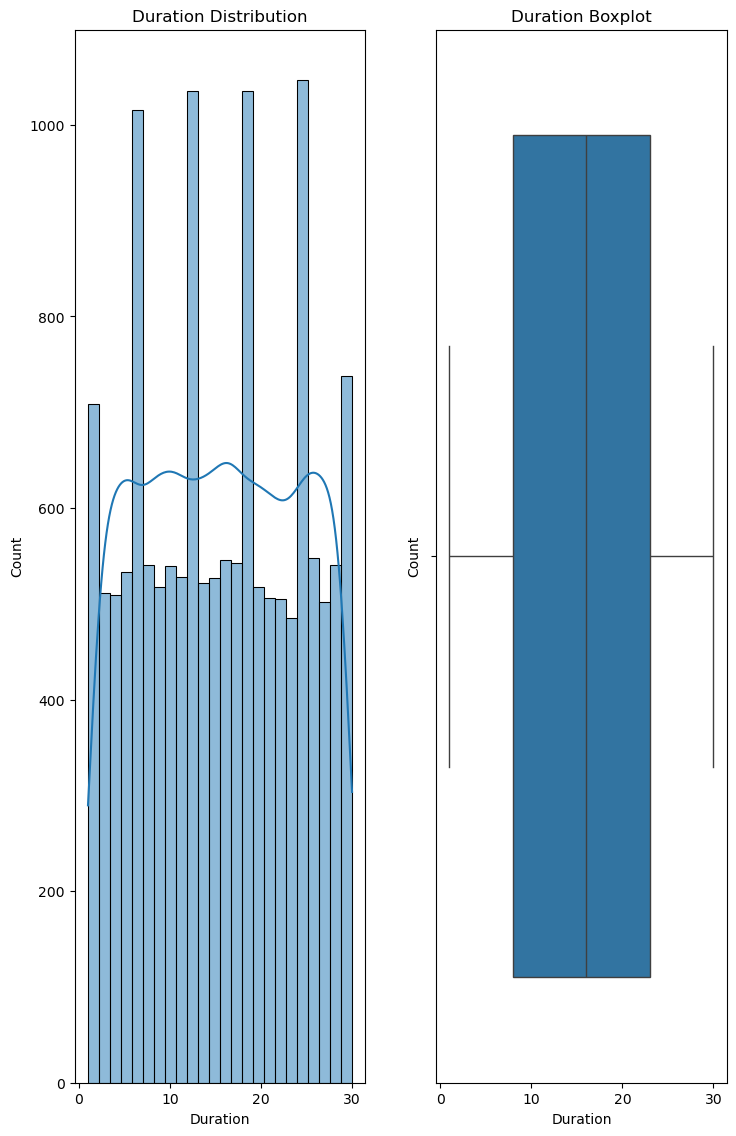

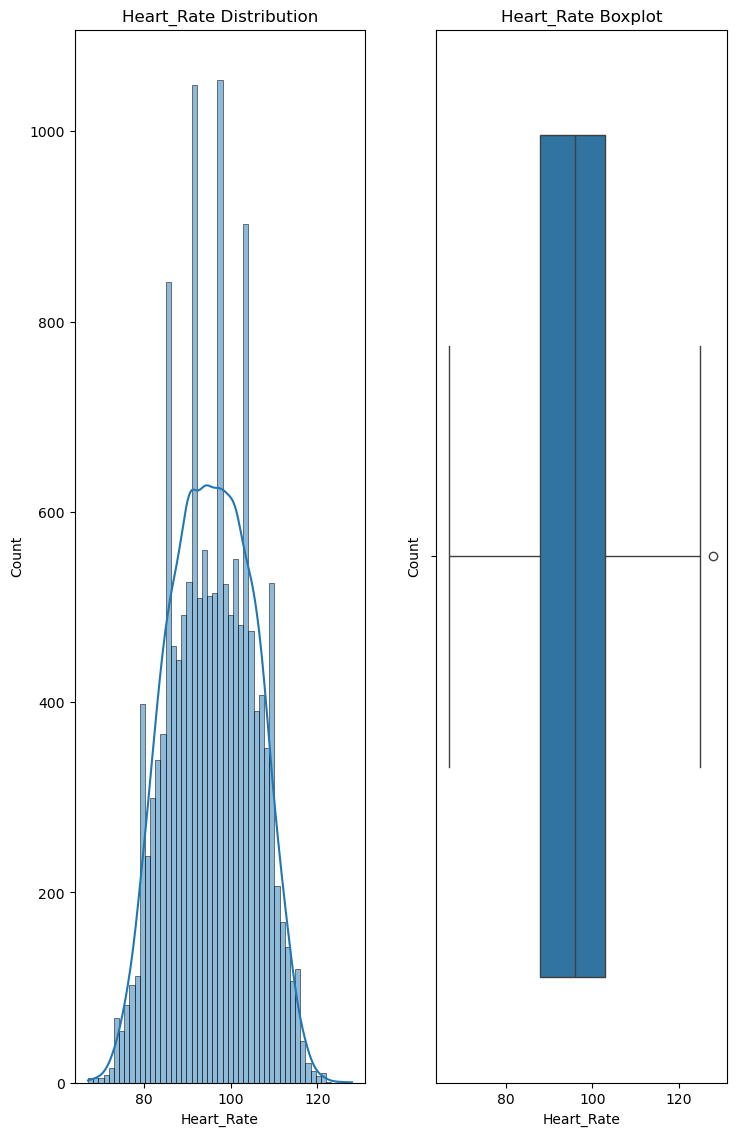

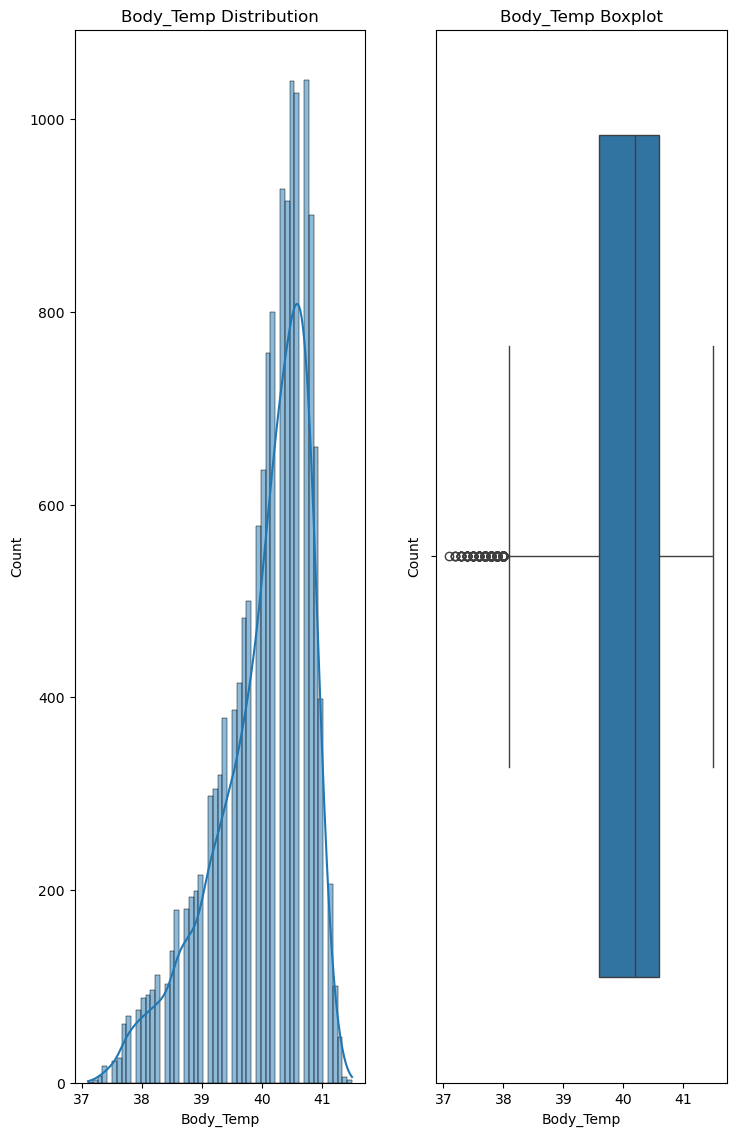

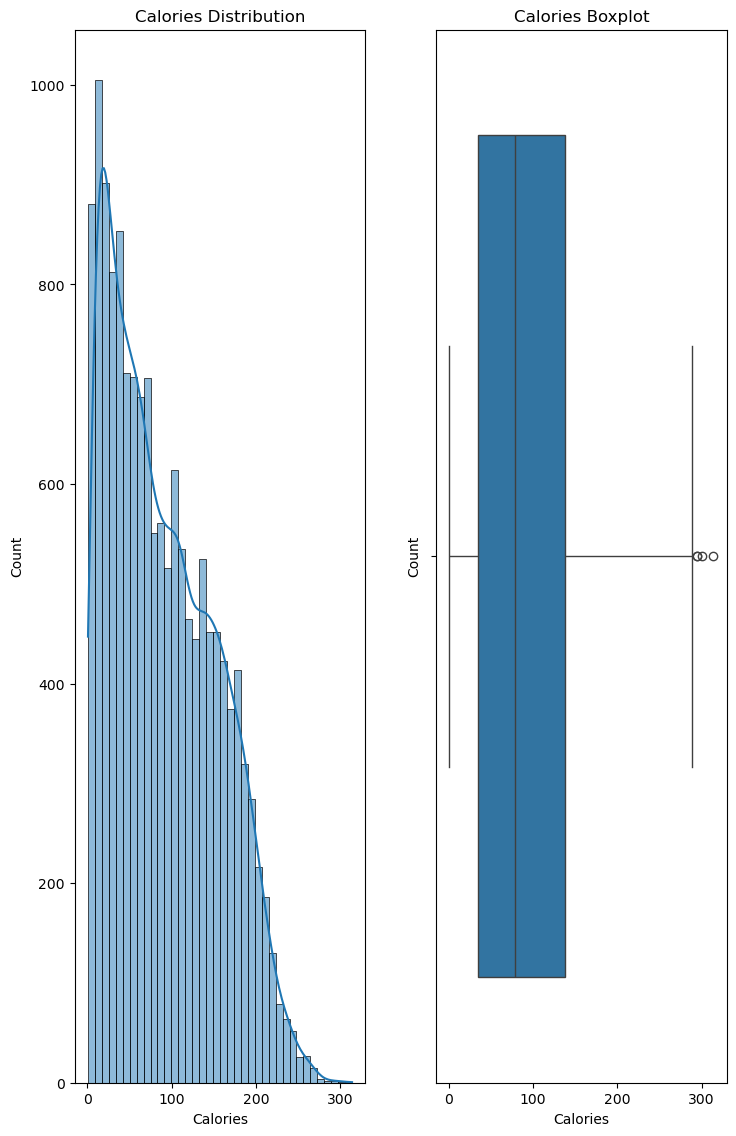

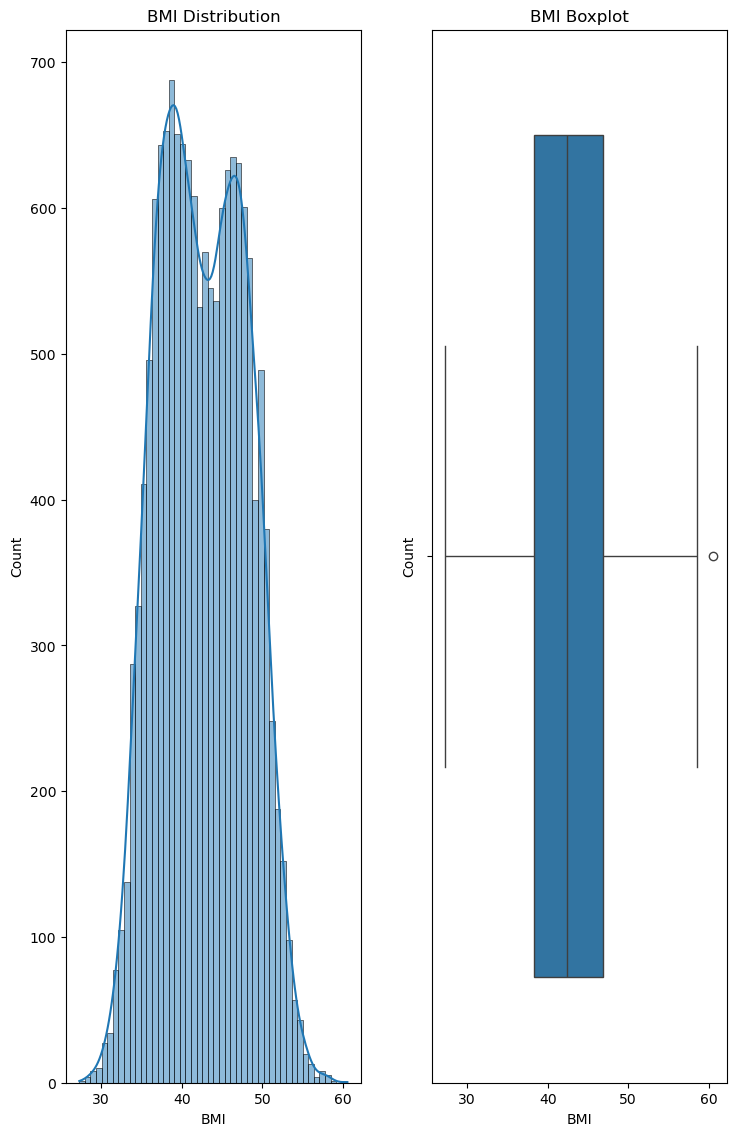

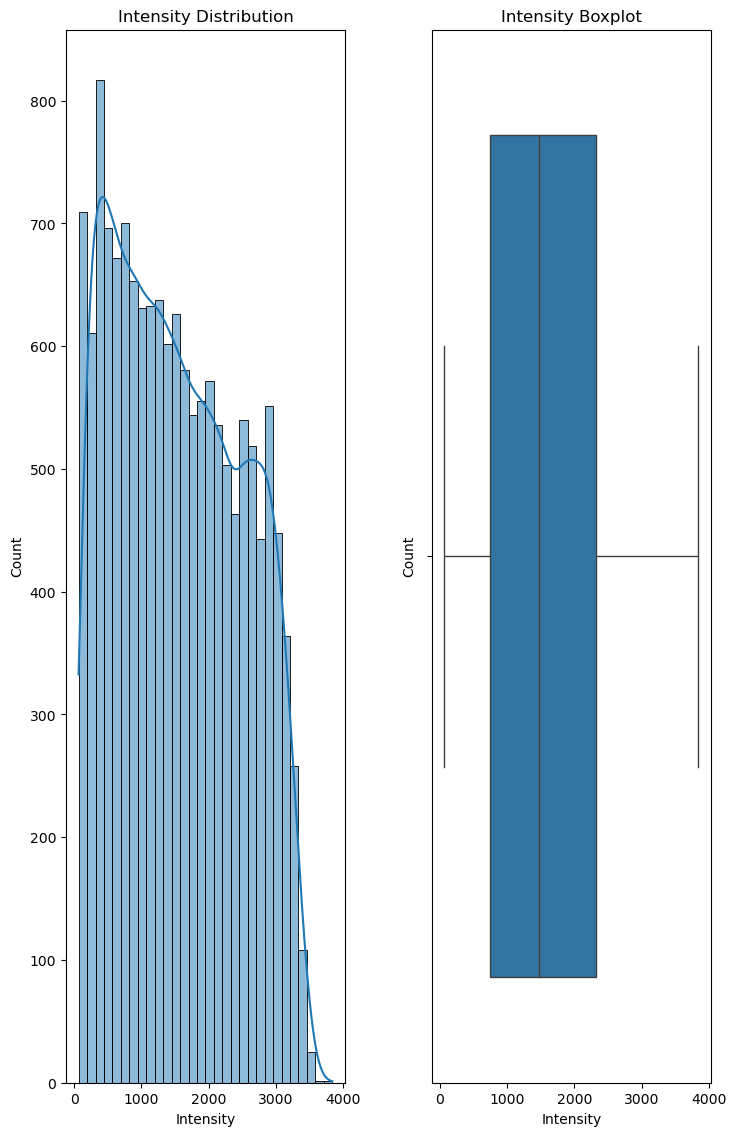

In [47]:
for column in numerical_columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 12))  
    
    # Histogram
    sns.histplot(data_set[column], kde=True, ax=axes[0])
    axes[0].set_title(f'{column} Distribution')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')

    
    # Boxplot
    sns.boxplot(x=data_set[column], ax=axes[1])
    axes[1].set_title(f'{column} Boxplot')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    
    
    plt.tight_layout(pad=3.0)
    plt.show()





### Insights from the Univariate Analysis

We see outliers in our
Height, weight, Hear-rate, Body_Temp, Calories,and BMI columns

### Bivariate Analysis

In [49]:
# We will do a bivariate analysis for the numerical columns 

In [50]:
num_columns = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp','BMI', 'Intensity']


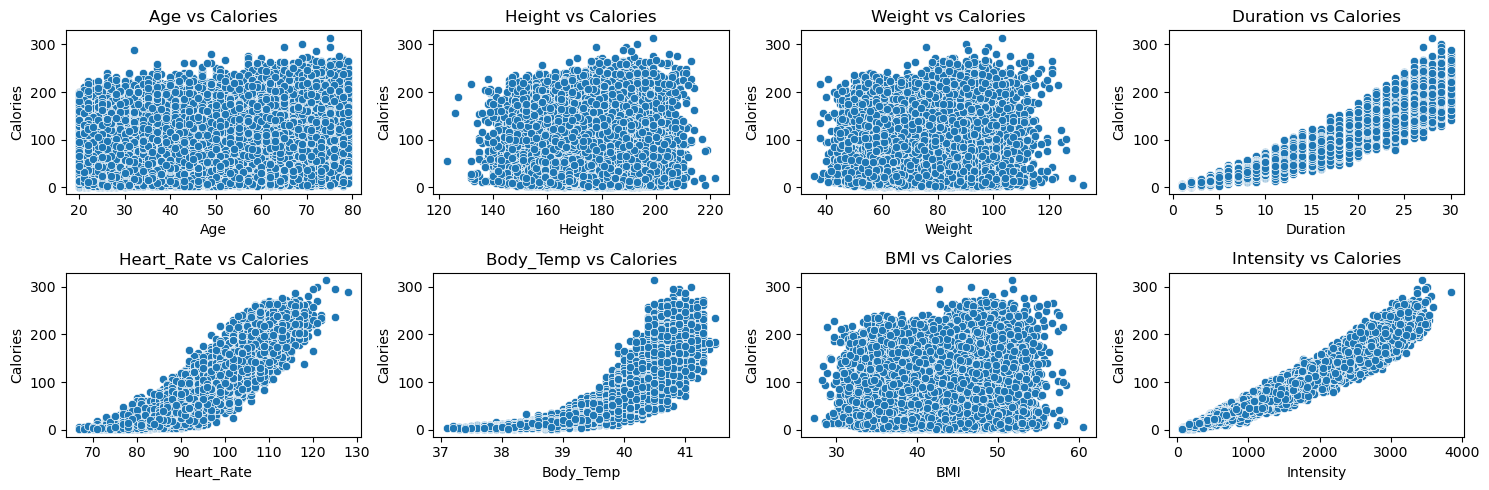

In [51]:
# Adjusting the figure size and layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))  # Wider layout
axes = axes.flatten()

# Now we plot the relevant columns assigned to num_columns against 'Calories'
for i, column in enumerate(num_columns):
    sns.scatterplot(data=data_set, x=column, y='Calories', ax=axes[i])
    axes[i].set_title(f'{column} vs Calories')
    

plt.tight_layout() # This prevents overlapping of titles
plt.show()
 

In [55]:
# To plot our Heat map for further bi-variate analysis, I have created a Correlation Matrix
numerical_column = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'BMI', 'Intensity']
corr_matrix = data_set[numerical_column].corr()

corr_matrix

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Intensity,log_Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395,0.137045,0.013229,0.128931
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537,0.894630,-0.004557,-0.009760
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481,0.982587,-0.001833,0.004063
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421,0.000166,0.993349,0.929052
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882,0.006639,0.890578,0.865831
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558,0.006258,0.877184,0.940504
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000,0.042012,0.974597,0.894227
BMI,0.137045,0.894630,0.982587,0.000166,0.006639,0.006258,0.042012,1.000000,0.000197,0.009764
Intensity,0.013229,-0.004557,-0.001833,0.993349,0.890578,0.877184,0.974597,0.000197,1.000000,0.915483
log_Calories,0.128931,-0.009760,0.004063,0.929052,0.865831,0.940504,0.894227,0.009764,0.915483,1.000000


In [56]:
print(corr_matrix.shape)


(10, 10)


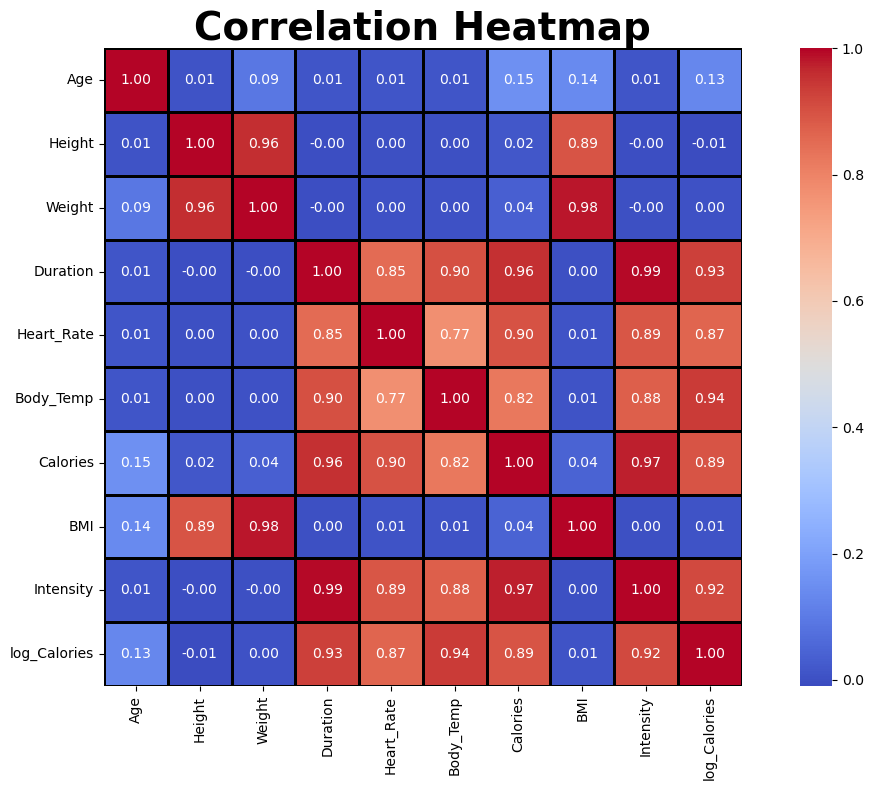

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square = True, linewidths=1,
    linecolor='Black')
plt.title('Correlation Heatmap', fontsize = 28, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [58]:
categories = [
    ('Age', 'Age Vs Calories', 10),
    ('Height', 'Height Vs Calories', 10),
    ('Weight', 'Weight Vs Calories', 10),
    ('Duration', 'Duration Vs Calories', 10),
    ('Heart_Rate', 'Heart_Rate Vs Calories', 10),
    ('Body_Temp', 'Body_Temp Vs Calories', 10),
    ('BMI', 'BMI Vs Calories', 10),
    ('Intensity', 'Intensity Vs Calories', 10)

]

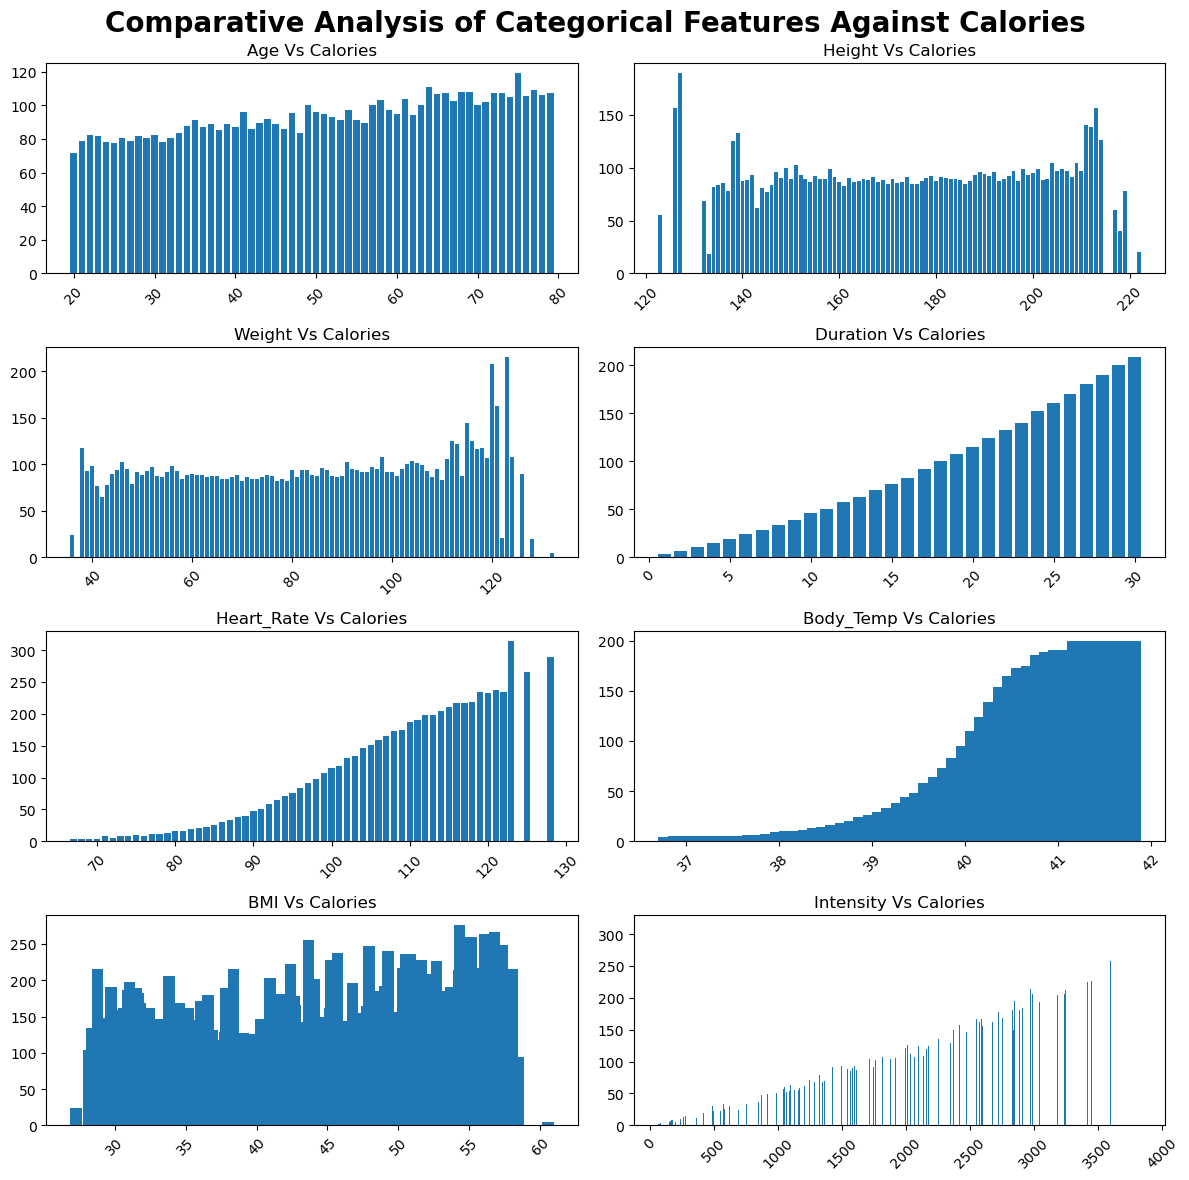

In [59]:
# Creating subplots

fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.flatten()

# I add an overall title to the figure
fig.suptitle('Comparative Analysis of Categorical Features Against Calories',
             fontsize=20, fontweight='bold')

# Looping through each category and plot on each axis
for i, (category, title, top_n) in enumerate(categories):
    
    # The data is grouped and the mean Calories is calculated for each category
    grouped_data = data_set.groupby(category)['Calories'].mean().sort_values(ascending=False)
    
    axes[i].bar(grouped_data.index, grouped_data.values)
    axes[i].set_title(title)
    
    # Rotating x-axis tick labels to prevent overlapping
    axes[i].tick_params(axis='x', rotation=45)

# I have further adjusted the layout using the tight layout function.This will make space for the title and rotated labels
plt.tight_layout()
plt.show()
    


### Insights

### Data Splitting

Data splitting is necessary to divide your data into two parts:
i. Train inputs and Train target: I will teach the model with these data. Here we train the data with 80% of the total

ii. Test input, test target: the model will use these to check if it has learned accurately

In [62]:
X = data_set.drop(columns =['Calories', 'log_Calories'])

Y = data_set['Calories']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
train_inputs, test_input, train_target, test_target = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Data Preprocessing

### Converting the values in Categorical columns to numerical values

For the purpose of the Linear regression model, categorical data like gender will be converted to numerical data.
This is because Linear regression models work with numerical inputs rather than text or categorical labels.

Here we will use the one-hot encoding to perform this conversion

#### Encoding

In [67]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [68]:
encoder = OneHotEncoder(drop ='first')

In [69]:
train_inputs.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Intensity,Age_Group,BMI_Category
9839,16554569,male,37,179,77,7,81,39.5,43.016760,567,Adults,Morbidly Obese
9680,18903739,male,23,195,87,26,110,40.5,44.615385,2860,Young Adults,Morbidly Obese
7093,11938260,male,33,181,77,12,88,40.1,42.541436,1056,Adults,Morbidly Obese
11293,14116395,female,66,156,54,9,77,39.5,34.615385,693,Seniors,Obese
820,13815395,female,32,144,49,5,90,39.0,34.027778,450,Adults,Obese


In [70]:
train_cat = encoder.fit_transform(train_inputs[categorical_columns])

test_cat = encoder.transform(test_input[categorical_columns])

In [71]:
train_cat.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.]])

## Scaling

This involves placing all the numerical data on the same range. This ensure that the machine learning model does not predict with bias.

In [73]:
scaler = StandardScaler()

In [74]:
numerical_columns

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'BMI', 'Intensity'],
      dtype='object')

In [75]:
num_col = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp','BMI', 'Intensity']

In [76]:
train_num = scaler.fit_transform(train_inputs[num_col])

test_num = scaler.transform(test_input[num_col])

In [77]:
train_num

array([[-0.33729461,  0.32323185,  0.1395506 , ..., -0.67103106,
         0.08546456, -1.05825711],
       [-1.16332224,  1.44792406,  0.80595486, ...,  0.61448958,
         0.38557478,  1.42092054],
       [-0.57330251,  0.46381838,  0.1395506 , ...,  0.10028132,
        -0.003768  , -0.52955328],
       ...,
       [ 0.84274485,  1.02616448,  1.13915699, ..., -0.67103106,
         1.1481095 , -0.89283444],
       [-0.45529856, -0.02823446,  0.07291018, ...,  0.22883339,
         0.20962955, -0.41278434],
       [-0.98631632,  0.53411164,  0.73931444, ...,  0.61448958,
         0.8806875 , -0.09707572]])

In [78]:
# Combining the training datas and the test data
train_processed = np.hstack((train_num, train_cat.toarray()))

test_processed = np.hstack((test_num, test_cat.toarray()))

In [79]:
train_processed

array([[-0.33729461,  0.32323185,  0.1395506 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.16332224,  1.44792406,  0.80595486, ...,  1.        ,
         0.        ,  0.        ],
       [-0.57330251,  0.46381838,  0.1395506 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.84274485,  1.02616448,  1.13915699, ...,  0.        ,
         0.        ,  0.        ],
       [-0.45529856, -0.02823446,  0.07291018, ...,  0.        ,
         0.        ,  0.        ],
       [-0.98631632,  0.53411164,  0.73931444, ...,  1.        ,
         0.        ,  0.        ]])

### Model Selection

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
model= LinearRegression()

### Model Training

Now I train the model with the processed data

In [84]:
model.fit(train_processed, train_target)

LinearRegression()

In [85]:
train_pred = model.predict(train_processed)

test_pred = model.predict(test_processed)

### Model Evaluation

The model is now being evaluated

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
train_mse = mean_squared_error(train_pred, train_target)

test_mse = mean_squared_error(test_pred, test_target)

In [89]:
train_mse, test_mse

(59.84322569841101, 62.417436230628695)

#### The test error is more than the train error. The model performs better with the data set it trained on. 
#### This phenomenon is known as overfitting

To combat this, I can:

i. Reduce the number of features or

ii. Use more data 

In [90]:
train_score = r2_score(train_pred, train_target)

test_score = r2_score(test_pred, test_target)

In [91]:
train_score, test_score

(0.9842765688517967, 0.984184423390453)

##### My model showed a score of 98.4% for training and a score of 98.41% for testing.

This is a good performance